## Assignment 2 - Exploratory Data Analysis

> ### Luca Porto

### Ex1: Generate data from a Poisson distribution. Vary at rates $\lambda$ on the interval [1,10] and show the graph of the average as a function of the variance. 

[1.00129, 1.99698, 3.00439, 3.99415, 5.00656, 5.99936, 6.98626, 7.99133, 8.99498, 9.98084]
[0.9946483358999999, 2.0144308796000003, 3.0063107279, 3.9903957774999994, 4.9837769664, 5.9961395903999986, 6.951951212400001, 7.962334831099999, 8.984674799600002, 9.9924328944]


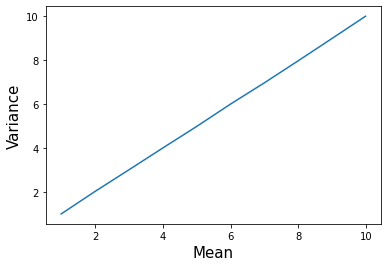

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

np.random.seed(16)
mn, vari = [],[]
for i in range(1,11):
  lbd = i # taxa
  n = 100000 # number of points extracted from a Poisson distribution 
  P = np.random.poisson(lbd, n)
  mn.append(np.mean(P))
  vari.append(np.var(P))

  # Uncomment to plot the Poisson distributions with lbd from 1 to 10

  #count, bins, ignored = plt.hist(P, bins=10, density=True, color='#0504aa',alpha=0.7, rwidth=0.9)
  #plt.xlabel('k', fontsize = 15)
  #plt.ylabel('P(k)',fontsize = 15)
  #plt.show(True)

plt.plot(mn, vari)
plt.xlabel('Mean', fontsize = 15)
plt.ylabel('Variance',fontsize = 15)
print(mn)
print(vari)

### Ex2: Consider the Iris dataset. Calculate the average, variance and IQR for each attribute. 

In [2]:
from scipy.stats import iqr

df = pd.read_csv('data/iris.csv', header=(0))

# Iterating trough columns and getting the required information
for column in df.columns[:-1]:
    print(column +':')
    print('- average: ', df[column].mean())
    print('- variance: ', df[column].var())
    print('- IQR: ', iqr(df[column]))
    print('\n')

sepal_length:
- average:  5.843333333333334
- variance:  0.6856935123042507
- IQR:  1.3000000000000007


sepal_width:
- average:  3.0540000000000003
- variance:  0.1880040268456376
- IQR:  0.5


petal_length:
- average:  3.758666666666666
- variance:  3.113179418344519
- IQR:  3.4999999999999996


petal_width:
- average:  1.1986666666666668
- variance:  0.582414317673378
- IQR:  1.5




### Ex3: Obtain the boxplot of every variable of the Iris flower, for each species.

<Figure size 432x288 with 0 Axes>

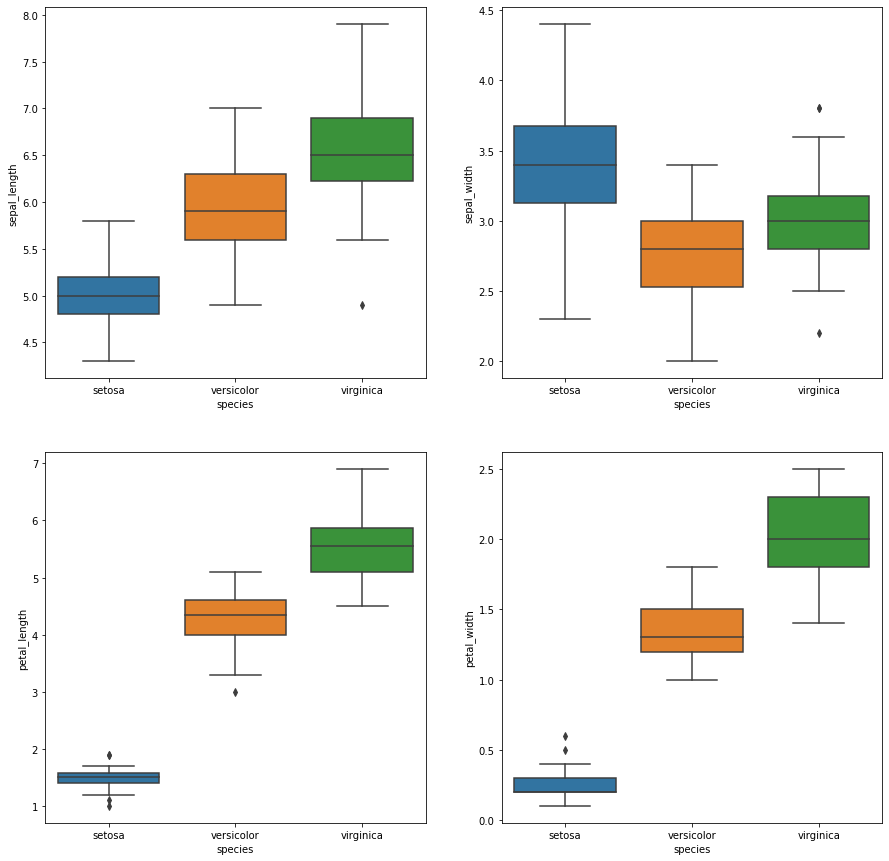

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i,column in zip(range(1,5),df):
    plt.subplot(2,2,i)
    sns.boxplot(x='species', y = column, data=df)

### Ex4: - For the log() function, investigate how the Pearson and Spearman correlations vary according to the data interval. 


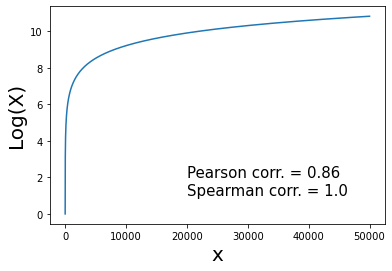

In [4]:
# Generating data based on the log function with x values ranging from 1 to 10000

from scipy.stats import pearsonr, spearmanr

x = np.linspace(1, 50000, 50000) 
z = np.log(x)

plt.plot(x, z) 
plt.xlabel("x",fontsize = 20) 
plt.ylabel("Log(X)", fontsize = 20) 
corr, p_value = pearsonr(x, z)
corrs, p_values = spearmanr(x, z)
corr = int(corr*100)/100
corrs = int(corrs*100)/100
string = 'Pearson corr. = '+ str(corr)
plt.text(20000,2, string, fontsize=15)
string = 'Spearman corr. = '+ str(corrs)
plt.text(20000,1, string, fontsize=15)
plt.show()




>As we can observe, the Spearman correlation is greater than the Pearson one, this happens because the Log function represents a Monotonic Relationship, but not Linear, with variables changing(increasing) in a nonconstant rate.

> The Spearman Correlation evaluates the monotonic relationship between two continuous or ordinal variables, while the Pearson Correlation evaluates the linear relationship between two continuous variables. 

### Ex5: - Consider the given x array and apply it to the function $y = 0.5*x + noise$. Vary the noise and calculate the Pearson and Spearman correlations, showing the scatterplots with the coeficients values. 


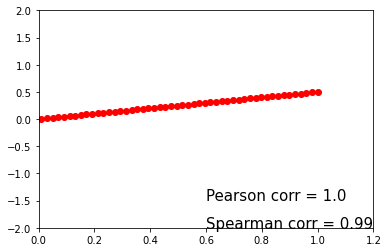

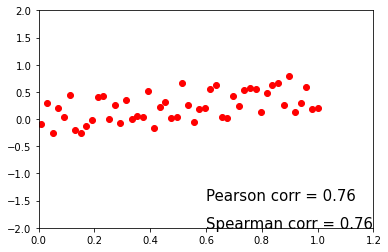

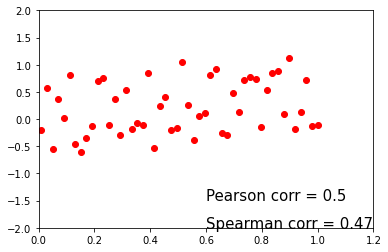

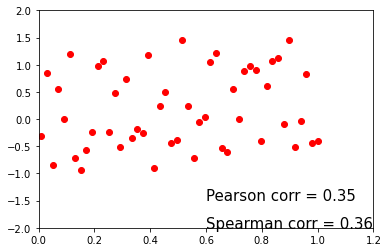

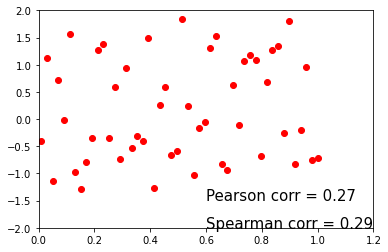

In [10]:
N = 100
x = np.linspace(-1,1, N)
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.
for sigma in np.arange(0,2,0.4):
    y = 0.5*x + erro*sigma
    plt.plot(x,y, 'ro')
    corr, p_value = pearsonr(x, y) # calcula a correlação de pearson
    corrs, s_value = spearmanr(x, y) # calcula a correlação de spearman
    corr = int(corr*100)/100
    corrs = int(corrs*100)/100
    string = 'Pearson corr = '+ str(corr)
    plt.text(0.6,-1.5, string, fontsize=15)
    string = 'Spearman corr = '+ str(corrs)
    plt.text(0.6, -2, string, fontsize=15)
    plt.xlim(0,1.2)
    plt.ylim(-2, 2)
    plt.show(True)
